In [1]:
import pandas as pd # for working with data
import numpy as np # for working with data
import seaborn as sns # for making visualizations
from matplotlib import pyplot as plt # for making visualizations
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report 

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the CSV file
df = pd.read_csv('C:/Users/ashle/Downloads/Data Mining/instagram_data.csv')

In [4]:
# Exploring the data 
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [93]:
# Exploring the data 
df.dtypes

owner_id            object
owner_username      object
shortcode           object
is_video            object
caption             object
comments            object
likes               object
created_at         float64
location            object
imageUrl            object
multiple_images     object
username            object
followers          float64
following          float64
dtype: object

In [95]:
# Exploring the data 
df.columns

Index(['owner_id', 'owner_username', 'shortcode', 'is_video', 'caption',
       'comments', 'likes', 'created_at', 'location', 'imageUrl',
       'multiple_images', 'username', 'followers', 'following'],
      dtype='object')

In [97]:
# Exploring the data 
df.describe()

,created_at,followers,following
count,1.168900e+04,9.577000e+03,9.577000e+03
mean,1.682416e+09,2.460785e+06,4.932806e+03
std,5.432766e+07,1.606651e+07,7.837775e+04
min,1.315681e+09,1.000000e+00,0.000000e+00
25%,1.689106e+09,2.104850e+05,2.940000e+02
50%,1.706069e+09,5.217490e+05,6.850000e+02
75%,1.708597e+09,1.337823e+06,1.167000e+03
max,1.709535e+09,4.298311e+08,1.568394e+06


In [99]:
# Cleaning the data 
df.isna().sum()

owner_id              0
owner_username        2
shortcode             2
is_video              2
caption             161
comments              2
likes                 2
created_at            3
location           7169
imageUrl              3
multiple_images       3
username           2115
followers          2115
following          2115
dtype: int64

In [101]:
# Drop any missing values 
df.dropna(inplace=True)
print(df.isnull().sum())

owner_id           0
owner_username     0
shortcode          0
is_video           0
caption            0
comments           0
likes              0
created_at         0
location           0
imageUrl           0
multiple_images    0
username           0
followers          0
following          0
dtype: int64


In [8]:

# Convert features to numeric types 
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')
df['following'] = pd.to_numeric(df['following'], errors='coerce')

# Classify engagement levels 
df['engagement_rate'] = (df['likes'] + df['comments']) / df['followers']
# Define threshold and classify engagement levels as 'high' or 'low'
threshold = df['engagement_rate'].median()
df['engagement_level'] = df['engagement_rate'].apply(lambda x: 'high' if x > threshold else 'low')

# Convert 'is_video' and 'multiple_images' to numerical values, 1 = true, 0 = false
df['is_video'] = df['is_video'].apply(lambda x: 1 if str(x).lower() == 'true' else 0)
df['multiple_images'] = df['multiple_images'].apply(lambda x: 1 if str(x).lower() == 'true' else 0)

# Check before dropping 
columns_to_drop = ['owner_id', 'owner_username', 'shortcode', 'caption', 'location', 'imageUrl', 'username']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Display the DataFrame to verify the results
print(df[['is_video', 'multiple_images', 'engagement_rate', 'engagement_level']].head())


   is_video  multiple_images  engagement_rate engagement_level
0         0                1         0.007764             high
1         1                0         0.004385              low
2         1                0         0.005217             high
3         1                0         0.003364              low
4         1                0         0.008068             high


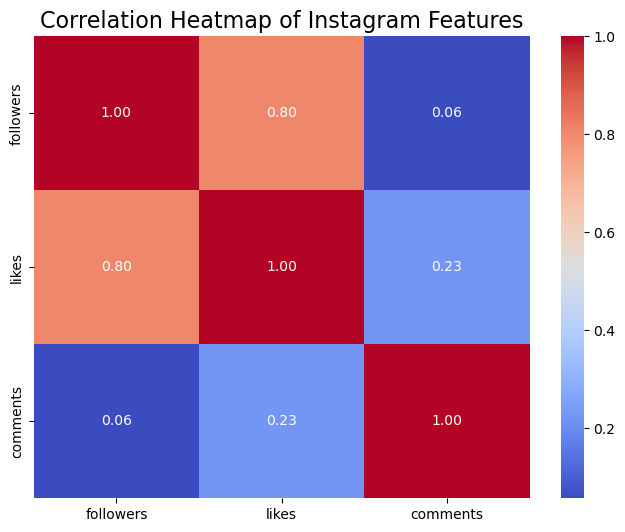

In [12]:
# Data Visualization using a heatmap 
correlation_matrix = df[['followers', 'likes', 'comments']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Instagram Features', fontsize=16)
plt.show()

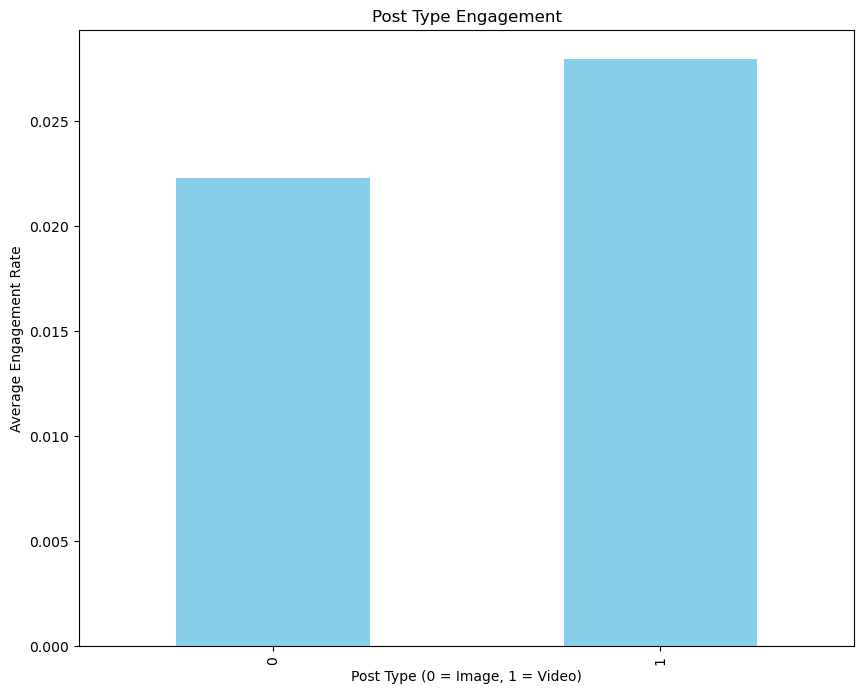

In [16]:
# Data Visualization 
post_type_engagement = df.groupby('is_video')['engagement_rate'].mean()
fig, ax = plt.subplots(figsize=(10, 8))
post_type_engagement.plot(kind='bar', color='skyblue', ax=ax)
ax.set(title="Post Type Engagement", 
       xlabel="Post Type (0 = Image, 1 = Video)", 
       ylabel="Average Engagement Rate")
plt.show()


In [169]:
# Train-test spilt 
from sklearn.model_selection import train_test_split

X = df.drop(columns=['engagement_level'])
y = df['engagement_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

# 2995 represents the number of rows in the training set 
# 3 is the number of is_video, multiple_images, and engagement_rate 
# Training set: 80% of the data, which is 2995 samples.
#Testing set: 20% of the data, which is 749 samples.

Training set size: (2995, 8), Testing set size: (749, 8)


In [191]:
# Modeling using Logistic Regression
model = LogisticRegression() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

# Detailed performance report
print(classification_report(y_test, y_pred, target_names=['low', 'high']))

Accuracy: 0.9893190921228304
              precision    recall  f1-score   support

         low       0.99      0.99      0.99       391
        high       0.99      0.99      0.99       358

    accuracy                           0.99       749
   macro avg       0.99      0.99      0.99       749
weighted avg       0.99      0.99      0.99       749



C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


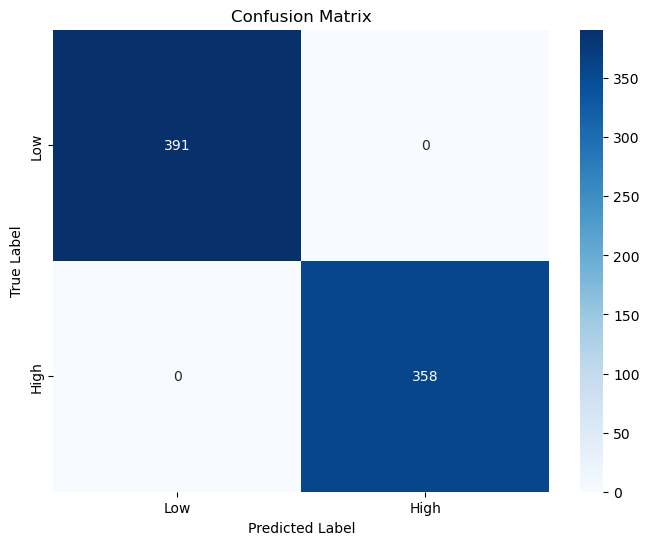

In [199]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
